In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/Project/3D_UNet_menisc_seg/scripts/

/content/gdrive/MyDrive/Project/3D_UNet_menisc_seg/scripts


In [3]:
!pip install segment_anything

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import h5py
import sys
sys.path.append('../src')
from utils import clip_and_norm
from datasets import KneeSegDataset3D

In [5]:
def show_mask_slices(img):
    num_subplots = 5
    plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

    for cnt, slnum in enumerate(range(0,img.shape[-1],img.shape[-1]//num_subplots**2)):

        if cnt < num_subplots**2:

            plt.subplot(num_subplots, num_subplots, cnt+1)
            plt.imshow(img[...,slnum], cmap = 'gray')
            plt.title('Slice {}'.format(slnum), fontsize= 20)
            #plt.axis('off')

    plt.tight_layout()
    plt.show()

In [6]:
# Define data path
DATA_DIR = '../data'

# Get the paths
train_paths = np.array([os.path.basename(i).split('.')[0] for i in glob.glob(f'{DATA_DIR}/train/*.im')])
val_paths = np.array([os.path.basename(i).split('.')[0] for i in glob.glob(f'{DATA_DIR}/valid/*.im')])
test_paths = np.array([os.path.basename(i).split('.')[0] for i in glob.glob(f'{DATA_DIR}/test/*.im')])

In [7]:
bad_path = 'train_026_V01'

for i, path in enumerate(train_paths):
  if path == bad_path:
    print(i)

51


In [8]:
im_num = 51

im_path = os.path.join(DATA_DIR, 'train', train_paths[im_num] + '.im')
seg_path = os.path.join(DATA_DIR, 'train', train_paths[im_num] + '.seg')

with h5py.File(im_path,'r') as hf:
    image = np.array(hf['data'])
with h5py.File(seg_path,'r') as hf:
    mask = np.array(hf['data'])

# normalise image
image = clip_and_norm(image, 0.005)

#medial meniscus
med_mask = mask[...,-1]

#lateral
lat_mask = mask[...,-2]

#both together
menisc_mask = np.add(med_mask,lat_mask)

In [9]:
show_mask_slices(image)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
slicenum = 105
im_slice = image[...,slicenum]
gt_slice = med_mask[...,slicenum]

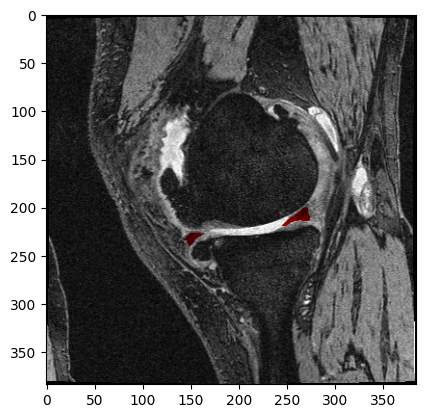

In [11]:
# Let's do a plot of a knee slice with the mask overlayed
from skimage import data, color, io, img_as_float

alpha = 1

# Construct RGB version of grey-level image
img_color = np.dstack((im_slice, im_slice, im_slice))

# Construct a colour image to superimpose
rows, cols = gt_slice.shape
color_mask = np.zeros((rows, cols, 3))
color_mask[...,0] = gt_slice
#color_mask[...,1] = gt_slice
#color_mask[...,2] = gt_slice

# Convert the input image and color mask to Hue Saturation Value (HSV)
# colorspace
img_hsv = color.rgb2hsv(img_color)
color_mask_hsv = color.rgb2hsv(color_mask)

# Replace the hue and saturation of the original image
# with that of the color mask
img_hsv[..., 0] = color_mask_hsv[..., 0]
img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha

img_masked = color.hsv2rgb(img_hsv)

# Display the output
#f, (ax0, ax1, ax2) = plt.subplots(1, 3,
#                                  subplot_kw={'xticks': [], 'yticks': []})
#ax0.imshow(im, cmap=plt.cm.gray)
#ax1.imshow(color_mask)
plt.imshow(img_masked)

plt.imsave('knee_slice_example.png', img_masked)

plt.show()

In [ ]:
mask.shape[-1]

6

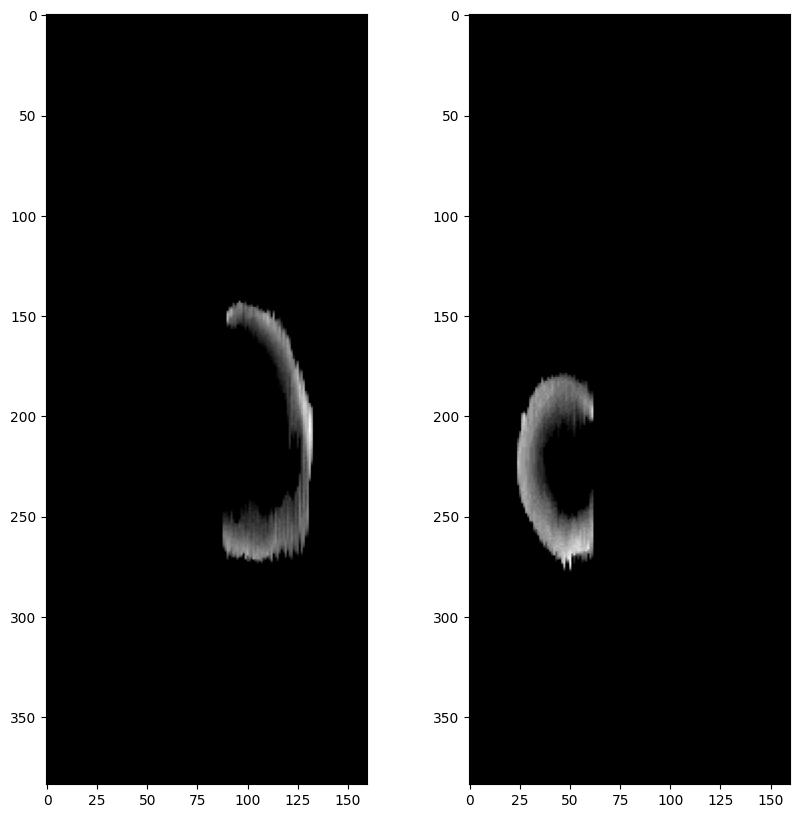

In [ ]:
plt.subplots(1, 2, figsize = (10,10))
plt.subplot(1, 2, 1)
plt.imshow(np.sum(med_mask,axis=0), cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(np.sum(lat_mask,axis=0), cmap = 'gray')
#plt.subplot(1, 3, 3)
#plt.imshow(np.sum(minisc_mask,axis=0), cmap = 'gray')

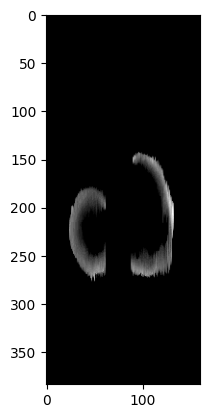

In [ ]:
# display each component
plt.imshow(np.sum(menisc_mask,axis=0), cmap = 'gray')
plt.show()

In [ ]:
knees = KneeSegDataset3D(train_paths, DATA_DIR)

image, mask = knees[51]

In [ ]:
mask.shape

torch.Size([1, 200, 256, 160])

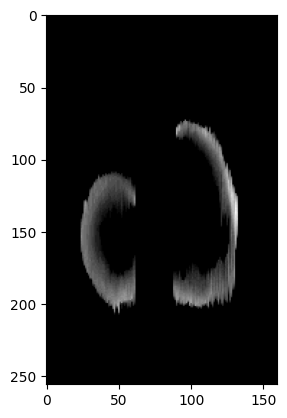

In [ ]:
plt.imshow(np.sum(mask.squeeze(0).numpy(),axis=0), cmap = 'gray')

In [ ]:
bad_path

'train_026_V01'

In [ ]:
# Get the paths
bad_mask_paths = np.array([os.path.basename(i).split('.')[0] for i in glob.glob(f'{DATA_DIR}/train_slice_gts/{bad_path}*.npy')])

In [ ]:
bad_mask_paths[:10]

array(['train_026_V01_slice_0', 'train_026_V01_slice_1',
       'train_026_V01_slice_2', 'train_026_V01_slice_3',
       'train_026_V01_slice_4', 'train_026_V01_slice_5',
       'train_026_V01_slice_6', 'train_026_V01_slice_7',
       'train_026_V01_slice_8', 'train_026_V01_slice_9'], dtype='<U23')

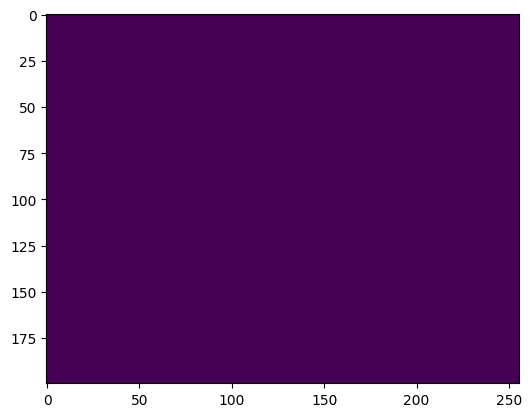

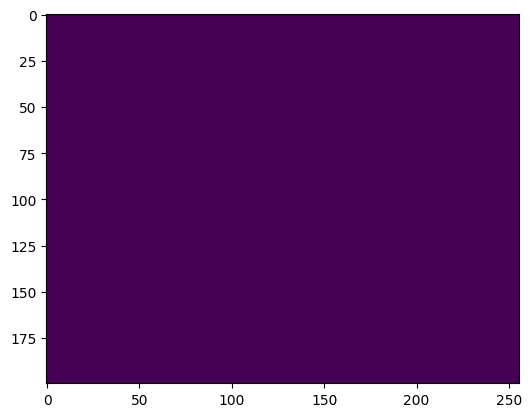

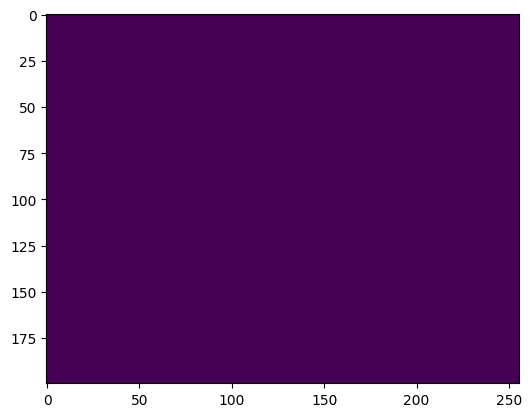

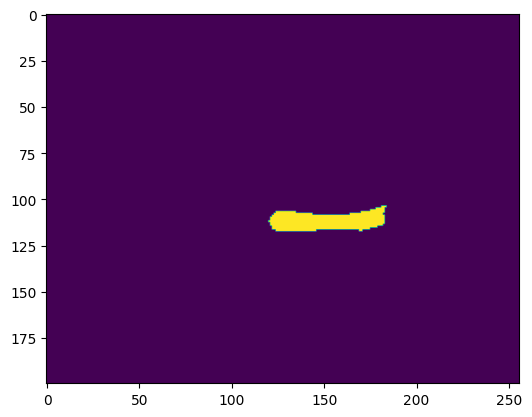

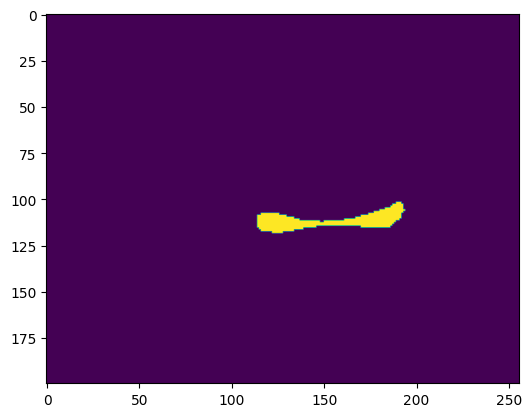

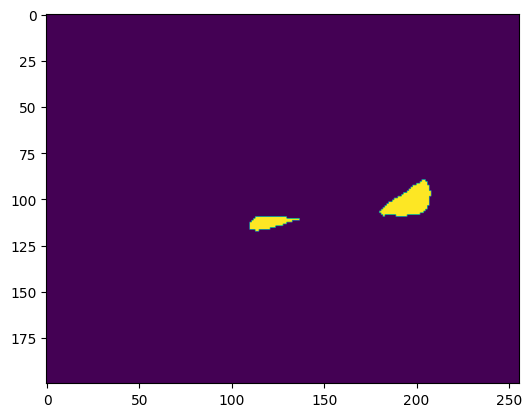

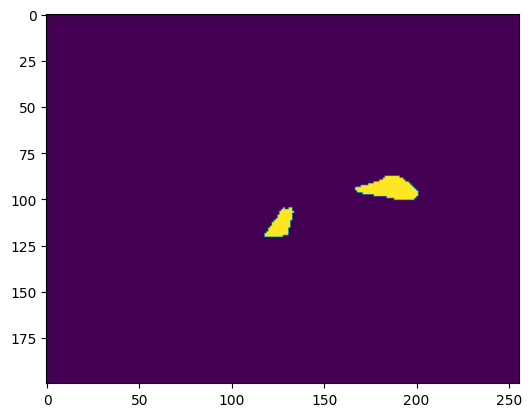

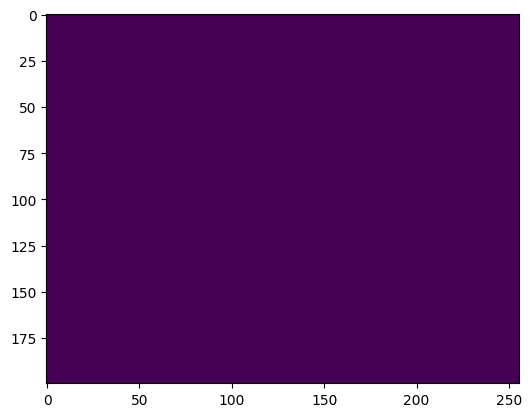

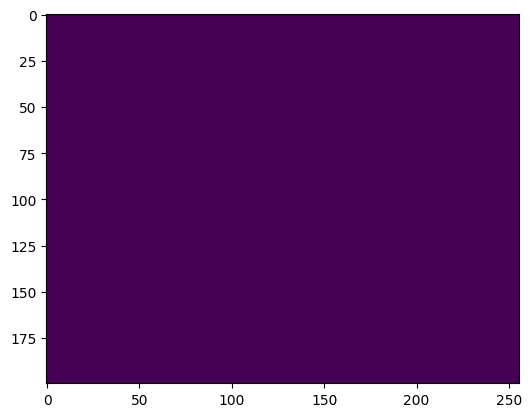

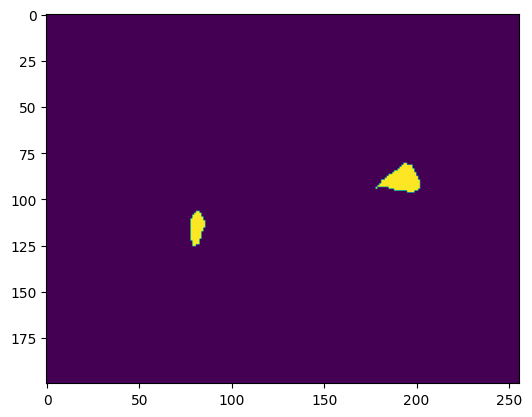

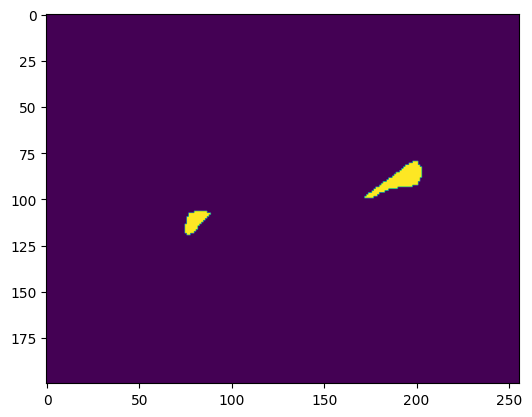

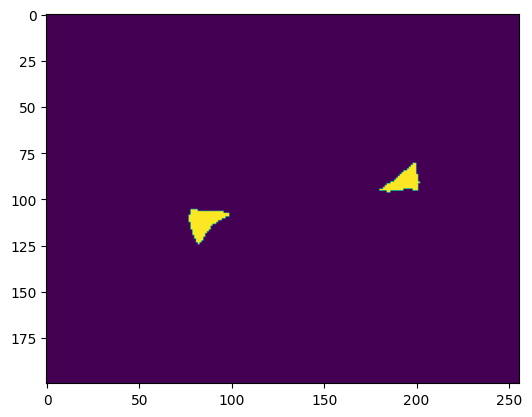

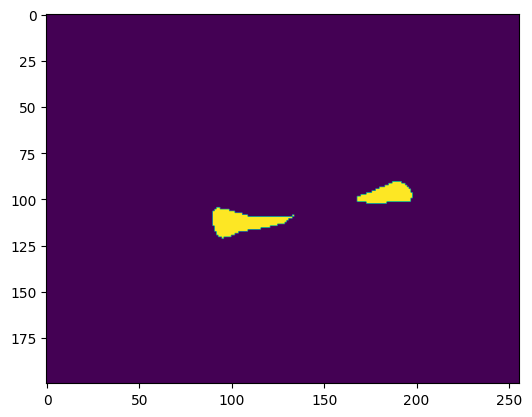

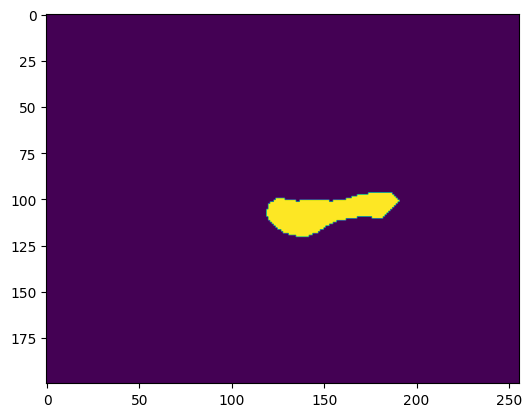

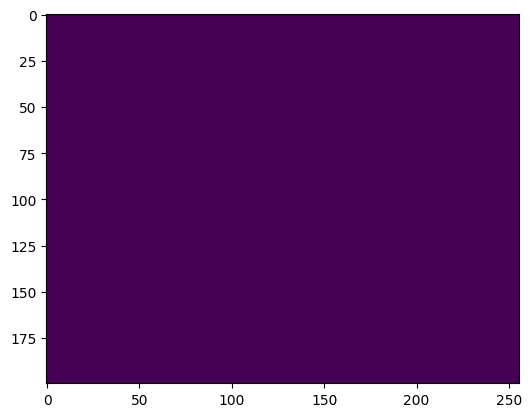

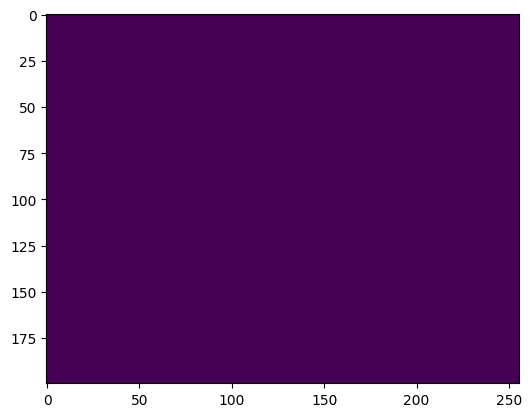

In [ ]:
for i in range(16):
    slice_num = 10*i

    sliceBoy = np.load(f'{DATA_DIR}/train_slice_gts/{bad_mask_paths[slice_num]}.npy')

    plt.imshow(sliceBoy)
    plt.show()

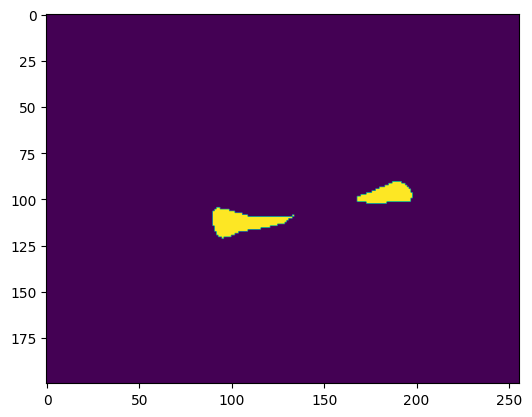

In [ ]:
plt.imshow(sliceBoy)